# 디비스캔 군집화

K-평균 군집화 방법은 단순하고 강력한 방법이지만 군집의 모양이 원형이 아닌 경우에는 잘 동작하지 않으며 군집의 갯수를 사용자가 지정해주어야 한다는 단점이 있다.

디비스캔(DBSCAN: Density-Based Spatial Clustering of Applications with Noise) 군집화 방법은 데이터가 밀집한 정도 즉 밀도를 이용한다. 디비스캔 군집화는 군집의 형태에 구애받지 않으며 군집의 갯수를 사용자가 지정할 필요가 없다. 디비스캔 군집화 방법에서는 초기 데이터로부터 근접한 데이터를 찾아나가는 방법으로 군집을 확장한다. 이 때 다음 사용자 인수를 사용한다.

* 최소 거리 $\varepsilon$: 이웃(neighborhood)을 정의하기 위한 거리
* 최소 데이터 갯수(minimum points): 밀집지역을 정의하기 위해 필요한 이웃의 갯수

만약 $\varepsilon$ 최소 거리안의 이웃 영역 안에 최소 데이터 갯수 이상의 데이터가 있으면 그 데이터는 핵심(core) 데이터다. 이렇게 핵심 데이터를 찾아낸 다음에는 이 핵심 데이터의 이웃 영역 안에 있는 데이터를 이 핵심데이터와 연결된 핵심 데이터로 정의한다. 핵심 데이터의 이웃영역안에 있는 데이터도 마찬가지로 연결된 핵심 데이터가 된다. 만약 고밀도 데이터에 더이상 이웃이 없으면 이 데이터는 경계(border) 데이터라고 한다. 핵심 데이터도 아니고 경계 데이터도 아닌 데이터를 outlier라고 한다.

<img src="https://datascienceschool.net/upfiles/3ee92719553b477fa941c84c0faebd34.png" >

scikit-learn의 cluster 서브패키지는 디비스캔 군집화를 위한 `DBSCAN` 클래스를 제공한다. 다음과 같은 인수를 받을 수 있다.

* `eps`: 이웃을 정의하기 위한 거리. epsilon.
* `min_samples`: 핵심 데이터를 정의하기 위해 필요한 이웃영역안의 데이터 갯수.

군집화가 끝나면 객체는 다음 속성을 가진다.

* `labels_`: 군집 번호. 아웃라이어는 -1 값을 가진다.
* `core_sample_indices_`: 핵심 데이터의 인덱스. 여기에 포함되지 않고 아웃라이어도 아닌 데이터는 경계 데이터다.


다음은 `make_circles` 명령과 `make_moons` 명령으로 만든 동심원, 초승달 데이터를 디비스캔으로 군집화한 결과를 나타낸 것이다. 마커(marker)의 모양은 군집을 나타내고 마커의 크기가 큰 데이터는 핵심데이터, x 표시된 데이터는 outlier다.

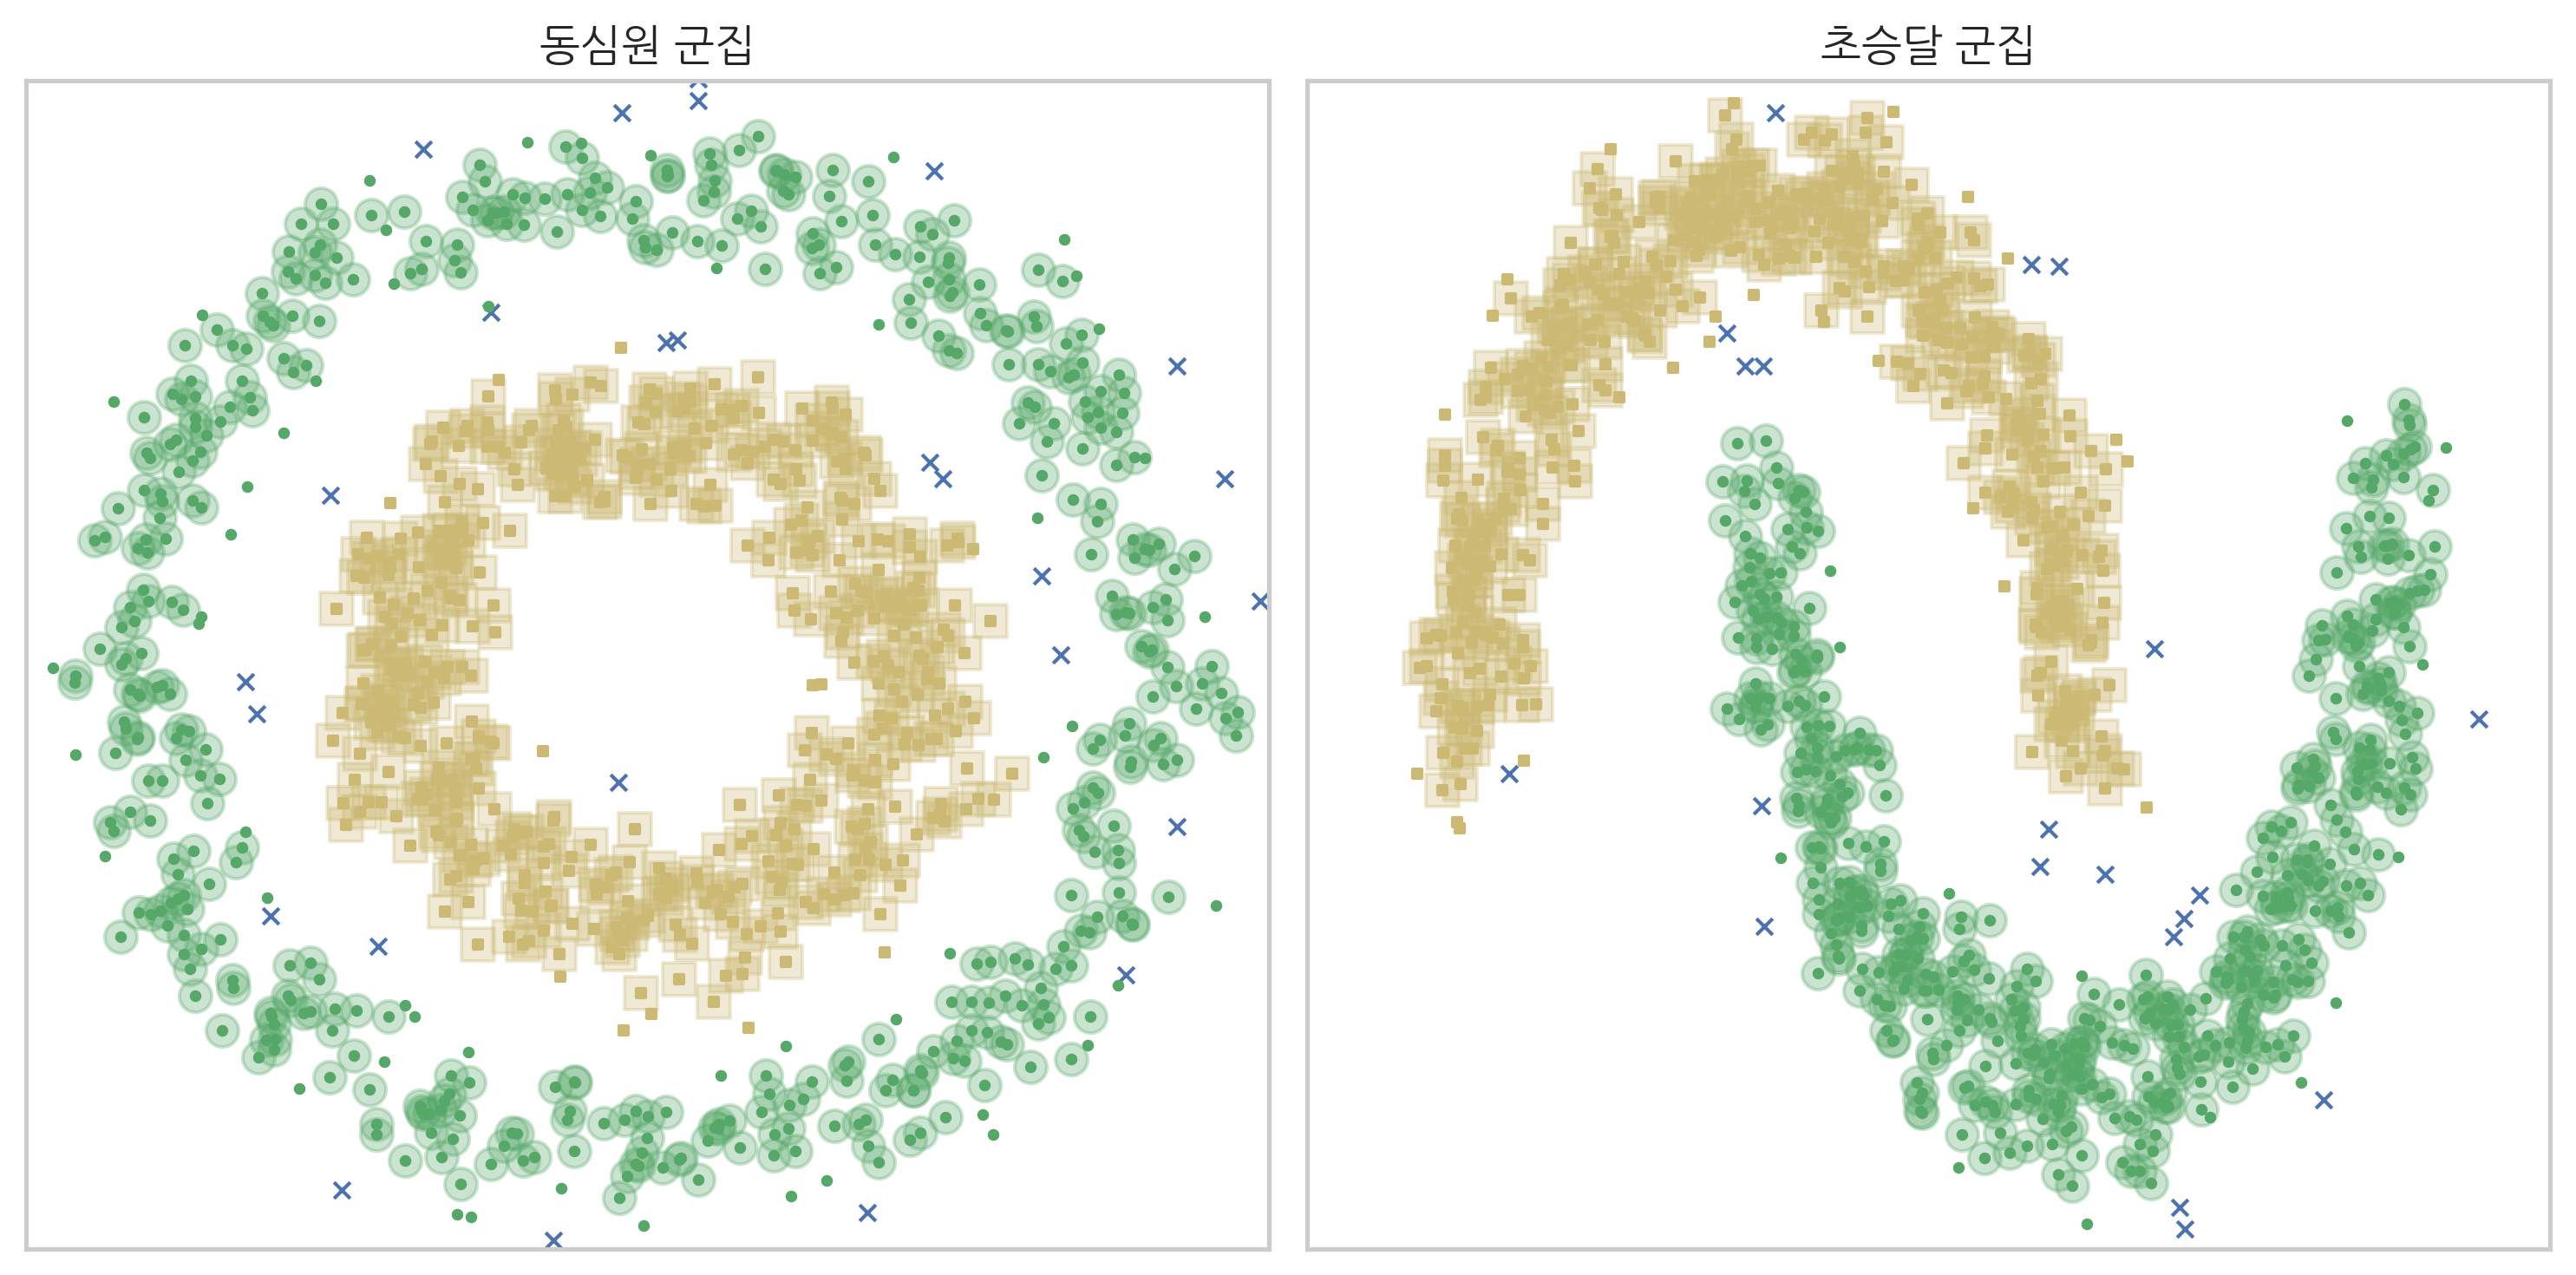

In [1]:
from sklearn.datasets import make_circles, make_moons
from sklearn.cluster import DBSCAN

n_samples = 1000
np.random.seed(2)
X1, y1 = make_circles(n_samples=n_samples, factor=.5, noise=.09)
X2, y2 = make_moons(n_samples=n_samples, noise=.1)

def plot_DBSCAN(title, X, eps, xlim, ylim):
    model = DBSCAN(eps=eps)
    y_pred = model.fit_predict(X)
    idx_outlier = model.labels_ == -1
    plt.scatter(X[idx_outlier, 0], X[idx_outlier, 1], marker='x', lw=1, s=20)
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1], marker='o', facecolor='g', s=5)
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1], marker='s', facecolor='y', s=5)
    X_core = X[model.core_sample_indices_, :]
    idx_core_0 = np.array(list(set(np.where(model.labels_ == 0)[0]).intersection(model.core_sample_indices_)))
    idx_core_1 = np.array(list(set(np.where(model.labels_ == 1)[0]).intersection(model.core_sample_indices_)))
    plt.scatter(X[idx_core_0, 0], X[idx_core_0, 1], marker='o', facecolor='g', s=80, alpha=0.3)
    plt.scatter(X[idx_core_1, 0], X[idx_core_1, 1], marker='s', facecolor='y', s=80, alpha=0.3)
    plt.grid(False)
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)
    return y_pred

plt.figure(figsize=(10, 5))
plt.subplot(121)
y_pred1 = plot_DBSCAN("동심원 군집", X1, 0.1, (-1.2, 1.2), (-1.2, 1.2))
plt.subplot(122)
y_pred2 = plot_DBSCAN("초승달 군집", X2, 0.1, (-1.5, 2.5), (-0.8, 1.2))
plt.tight_layout()
plt.show()

이 군집화 결과의 ARI와 AMI 값은 다음과 같다.

In [2]:
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score

print("동심원 군집 ARI:", adjusted_rand_score(y1, y_pred1))
print("동심원 군집 AMI:", adjusted_mutual_info_score(y1, y_pred1))
print("초승달 군집 ARI:", adjusted_rand_score(y2, y_pred2))
print("초승달 군집 AMI:", adjusted_mutual_info_score(y2, y_pred2))

동심원 군집 ARI: 0.9414262371038592
동심원 군집 AMI: 0.8967648464619999
초승달 군집 ARI: 0.9544844153926417
초승달 군집 AMI: 0.9151495815452475


#### 연습 문제 14.3.1

MNIST Digit 데이터를 디비스캔 군집화하고 군집의 갯수, ARI, AMI, 실루엣계수를 각각 계산하라.